In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from matplotlib import patches

In [2]:
import wrangle

In [5]:
logs_df = wrangle.get_sql_data()

In [9]:
logs_df['start_date'] = pd.to_datetime(logs_df['start_date'])
logs_df['end_date'] = pd.to_datetime(logs_df['end_date'])
logs_df['access_day'] = logs_df.index.day_name()
logs_df['access_month'] = logs_df.index.month
logs_df['access_year'] = logs_df.index.year

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?


2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
- Home page is most common

In [ ]:
df.groupby(['name','lesson'])['ip'].count().sort_values()

3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?


4. Are there any suspicious IP addresses?
- Find most common IP network portions (first segment of IP address)
- Find least common IP network portions

Recommendation: 
- Investigate least common IP networks as they may be suspicious

In [14]:
def explore_ip_addresses(logs_df):
    logs_df['ip_network_portion'] = logs_df['ip'].str.split('.').str[0]
    
    result1 = logs_df['ip_network_portion'].value_counts().head(10).to_frame().reset_index()
    result1.rename(columns={'index': 'ip_network_portion',
                            'ip_network_portion': 'log_count'}, inplace=True)
    print('Most Common IP addresses (network portion)')
    display(result1, '\n')    
    
    result2 = logs_df['ip_network_portion'].value_counts().tail(10).to_frame().reset_index()
    result2.rename(columns={'index': 'ip_network_portion',
                            'ip_network_portion': 'log_count'}, inplace=True)
    print('Least Common IP addresses (network portion)')
    display(result2)

In [15]:
explore_ip_addresses(logs_df)

Most Common IP addresses (network portion)


,ip_network_portion,log_count
0,97,331234
1,70,60093
2,72,52080
3,67,44472
4,76,38259
5,99,28875
6,173,27416
7,24,24346
8,136,23049
9,66,18823


'\n'

Least Common IP addresses (network portion)


,ip_network_portion,log_count
0,161,4
1,46,4
2,143,3
3,176,3
4,8,3
5,135,2
6,200,2
7,221,2
8,51,2
9,37,1


5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

- Monthly average logs of data science and web dev students both declined greatly in the second half of 2019

In [16]:
def plot_monthly_avg_ds_logs():
    
    plt.figure(figsize=(5, 3))

    ds_logs = df[df['program_id'] == 3]

    ds_monthly_avgs =  ds_logs.resample('M').size()

    sns.lineplot(ds_monthly_avgs)
    # Get the x-axis tick positions and labels
    tick_positions = pd.date_range(start='2019-01-01', end='2020-07-01', freq='6M')
    tick_labels = [str(date.date())[:7] for date in tick_positions]

    # Set the x-axis ticks using the tick positions and labels
    plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=30)

    plt.xlabel('Date')
    plt.ylabel('Average Logs')
    plt.title('Average Logs of Data Science')

    rectangle = patches.Rectangle((10000, 10000), 5000, 5000, linewidth=.5,
                                  edgecolor='#C40000', facecolor='none')

    ax = plt.gca()
    ax.add_patch(rectangle)

    plt.xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2020-07-01'))

    plt.tight_layout()
    sns.despine()
    plt.show()

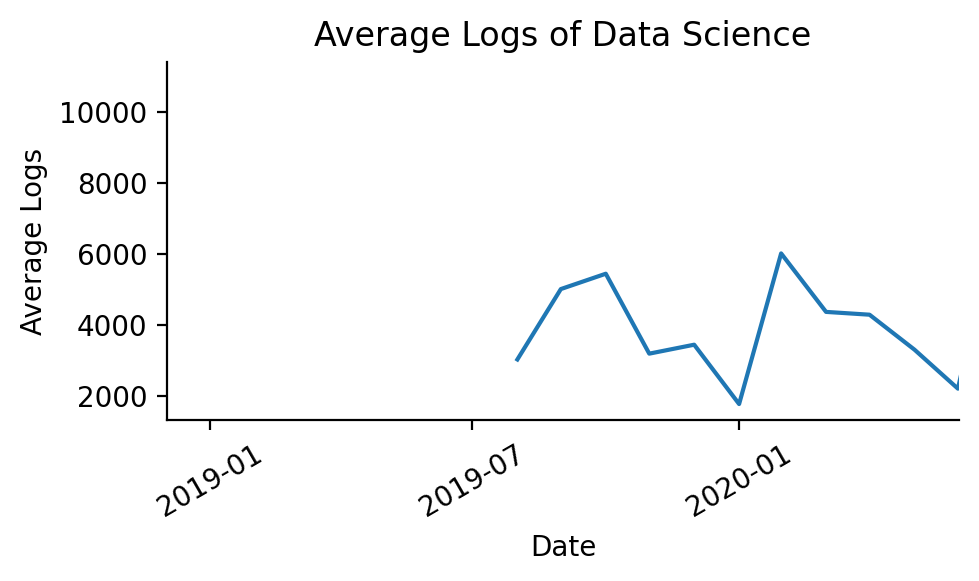

In [17]:
plot_monthly_avg_ds_logs()

In [18]:
def plot_monthly_avg_wd_logs():
    plt.figure(figsize=(5, 3))

    wd_logs = df[df['program_id'] != 3]

    wd_monthly_avgs = wd_logs.resample('M').size()

    sns.lineplot(wd_monthly_avgs)
    # Get the x-axis tick positions and labels
    tick_positions = pd.date_range(start='2019-01-01', end='2020-07-01', freq='6M')
    tick_labels = [str(date.date())[:7] for date in tick_positions]

    # Set the x-axis ticks using the tick positions and labels
    plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=30)

    plt.xlabel('Date')
    plt.ylabel('Average Logs')
    plt.title('Average Logs of Web Dev Students')

    plt.xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2020-07-01'))

    plt.tight_layout()
    sns.despine()
    plt.show()

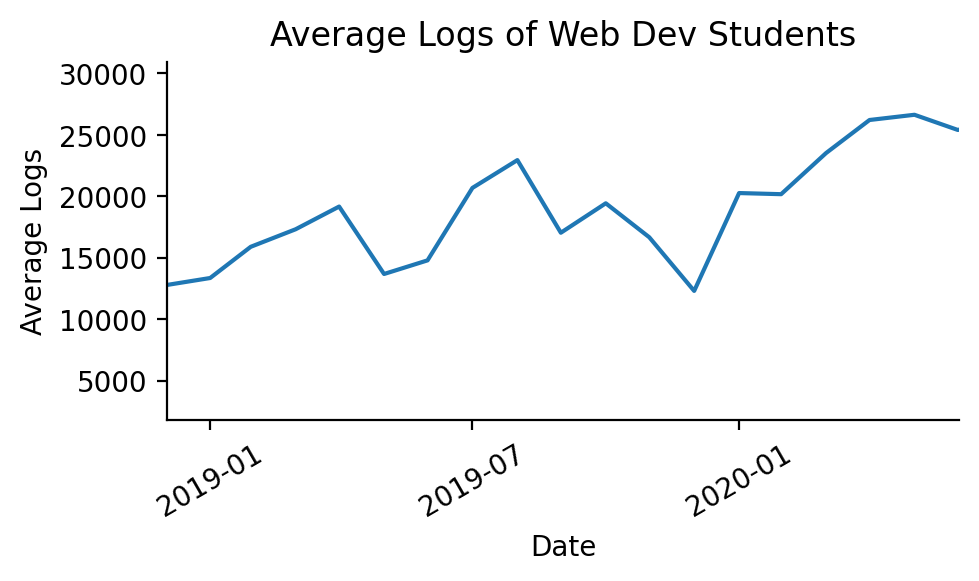

In [19]:
plot_monthly_avg_wd_logs()

6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

- Data Science: SQL, Classification, Anomaly Detection
- Web Dev: Spirng, HTML/CSS, Java

In [23]:
ds_alumni_logs = df[(df['program_id'] == 3) &
              (df.index > df['end_date']) &
                 (df['cohort'] != 'Staff')]
wb_alumni_logs = df[(df['program_id'] != 3) &
                      (df.index > df['end_date']) &
                         (df['cohort'] != 'Staff')]
alumni_logs = df[(df.index > df['end_date']) &
                 (df['cohort'] != 'Staff')]

In [24]:
ds_alumni_logs['lesson'].value_counts()[2:7]

sql/mysql-overview                                275
classification/overview                           267
classification/scale_features_or_not.svg          220
anomaly-detection/AnomalyDetectionCartoon.jpeg    193
anomaly-detection/overview                        191
Name: lesson, dtype: int64

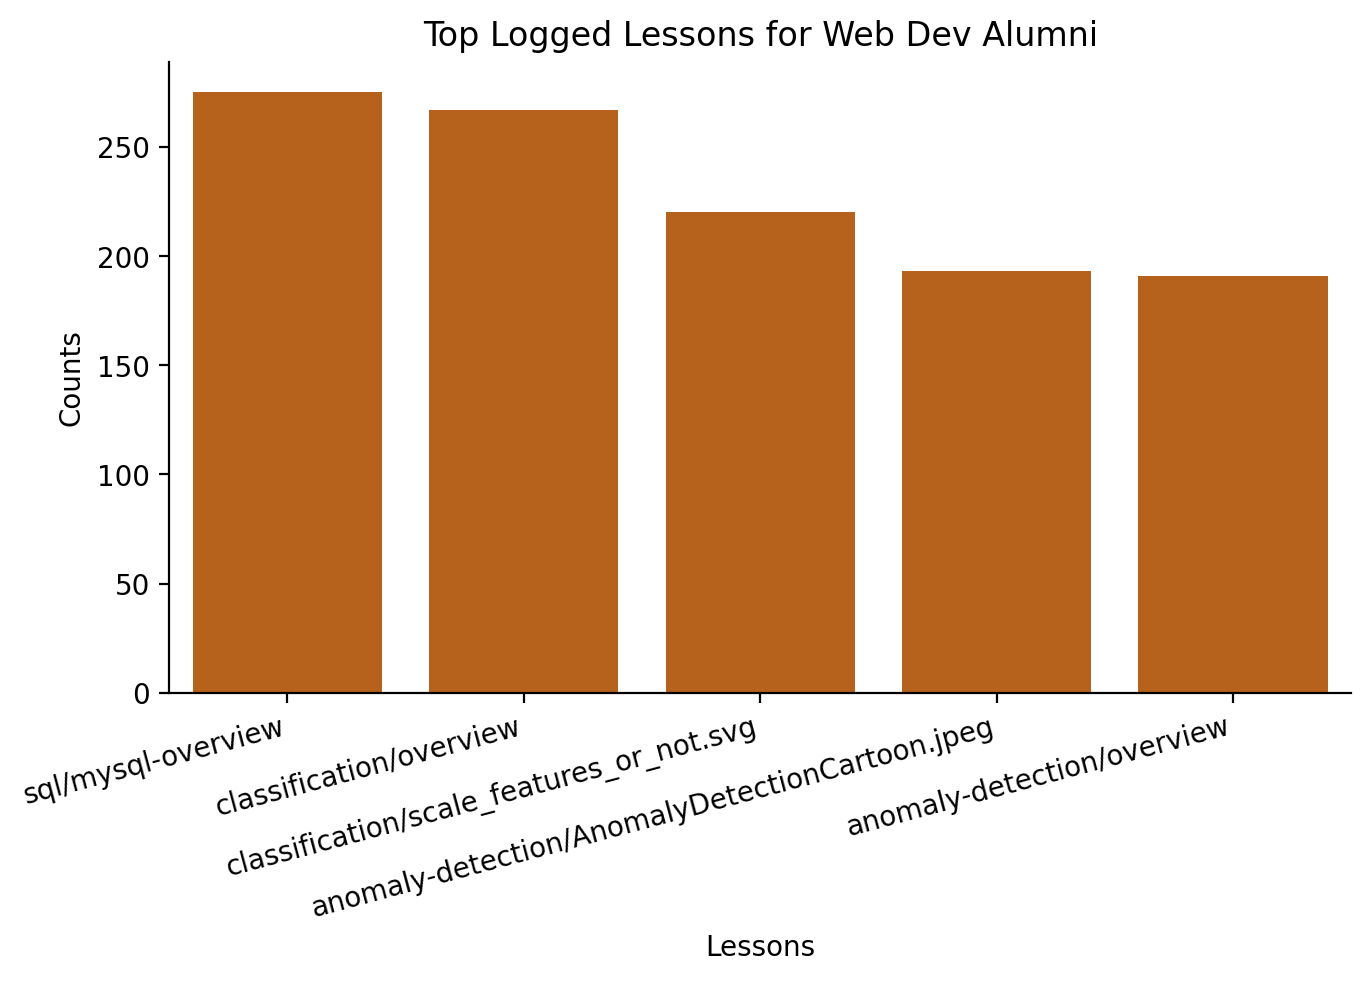

In [25]:
# Create a bar plot using Seaborn
plt.figure(figsize=(7, 5))
sns.barplot(x=ds_alumni_logs['lesson'].value_counts()[2:7].index,
            y=ds_alumni_logs['lesson'].value_counts()[2:7].values,
            color="#D16002")

plt.xlabel('Lessons')
plt.ylabel('Counts')
plt.title('Top Logged Lessons for Web Dev Alumni')

plt.xticks(rotation=15, ha='right')

plt.tight_layout()
sns.despine()
plt.show()

In [29]:
def plot_top_ds_alumni_lessons():
    ds_alumni_logs = df[(df['program_id'] == 3) &
              (df.index > df['end_date']) &
                 (df['cohort'] != 'Staff')]
    
    # Create a bar plot using Seaborn
    plt.figure(figsize=(7, 5))
    sns.barplot(x=ds_alumni_logs['lesson'].value_counts()[2:7].index,
                y=ds_alumni_logs['lesson'].value_counts()[2:7].values,
                color="#D16002")

    plt.xlabel('Lessons')
    plt.ylabel('Counts')
    plt.title('Top Logged Lessons for Web Dev Alumni')

    plt.xticks(rotation=15, ha='right')

    plt.tight_layout()
    sns.despine()
    plt.show()

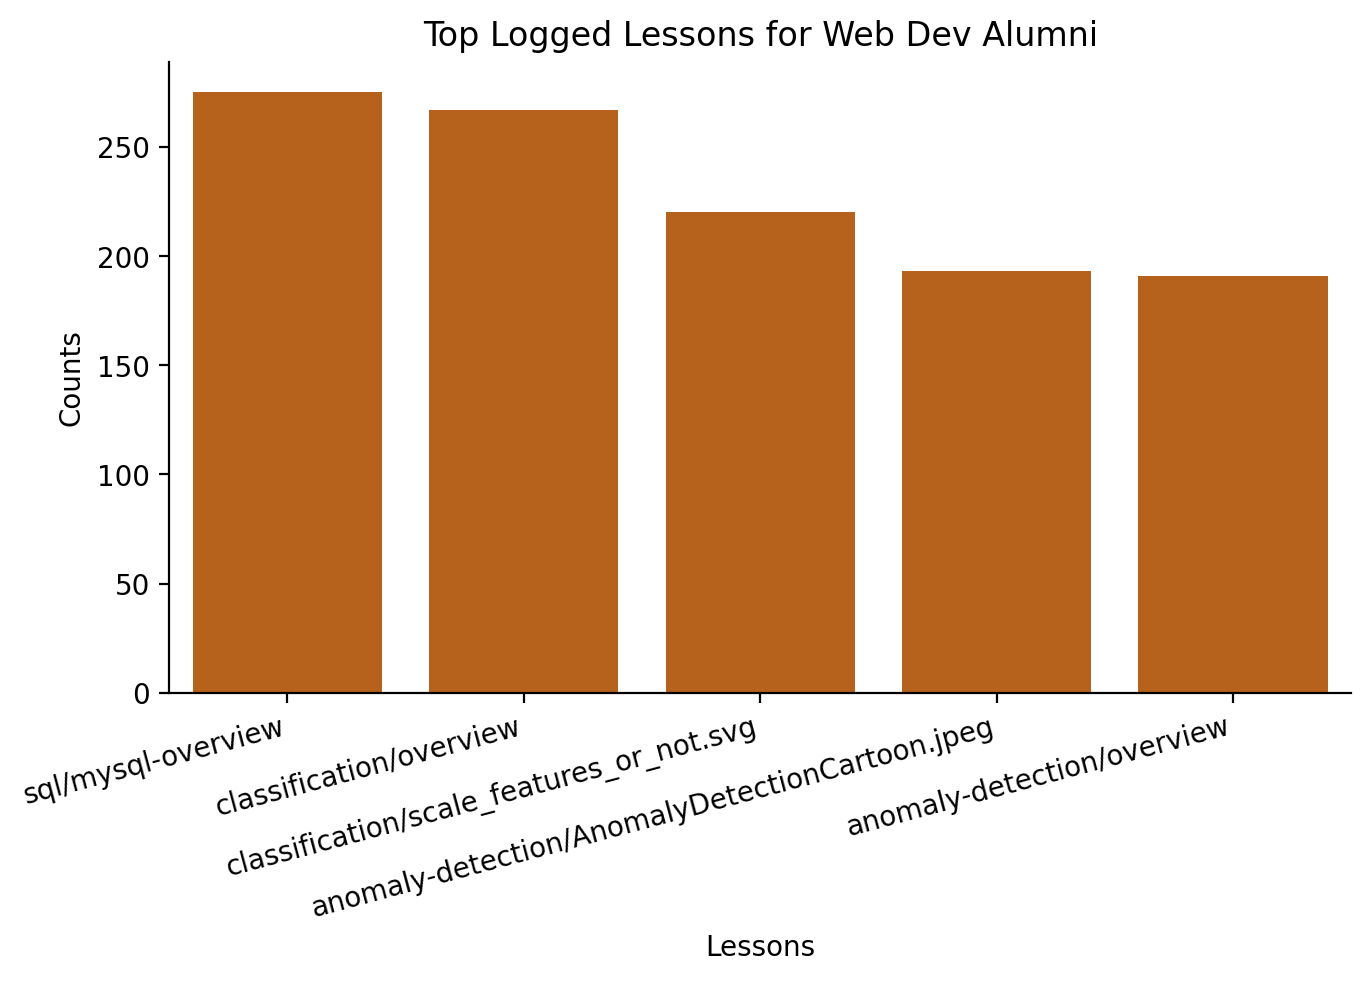

In [30]:
plot_top_ds_alumni_lessons()

In [31]:
value_counts_result = wb_alumni_logs['lesson'].value_counts()[2:8]
value_counts_result = value_counts_result.drop(value_counts_result.index[2])
value_counts_result

spring      2869
html-css    2403
java-i      2275
java-ii     2184
java-iii    2148
Name: lesson, dtype: int64

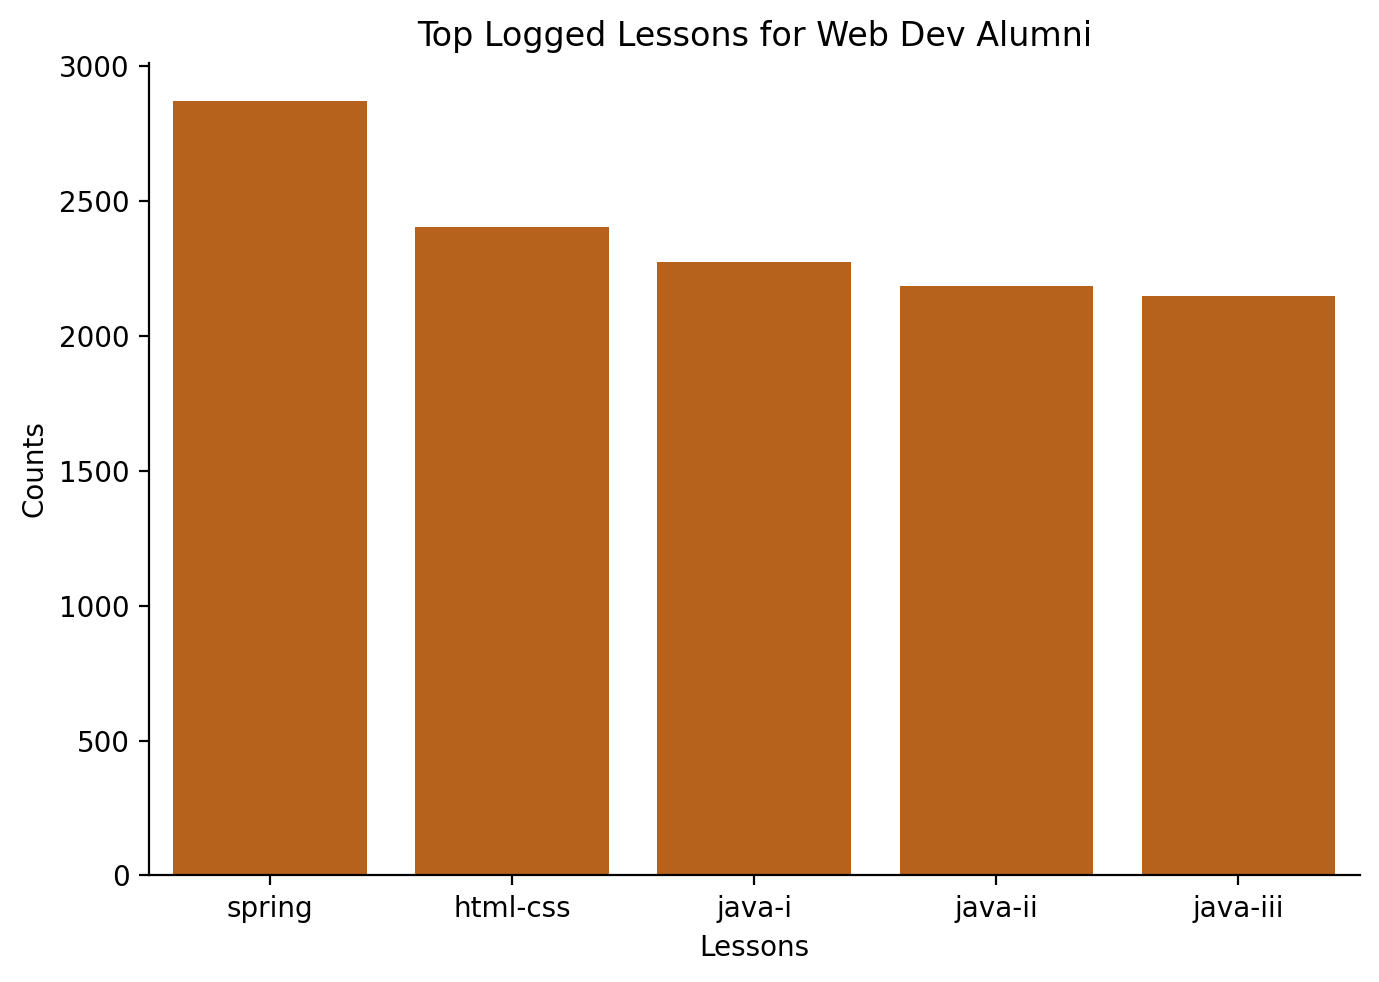

In [32]:
# Create a bar plot using Seaborn
plt.figure(figsize=(7, 5))
sns.barplot(x=value_counts_result.index, y=value_counts_result.values,
            color="#D16002")

plt.xlabel('Lessons')
plt.ylabel('Counts')
plt.title('Top Logged Lessons for Web Dev Alumni')

plt.tight_layout()
sns.despine()
plt.show()

In [33]:
def plot_top_wb_alumni_lessons():
    wb_alumni_logs = df[(df['program_id'] != 3) &
                          (df.index > df['end_date']) &
                             (df['cohort'] != 'Staff')]
    
    value_counts_result = wb_alumni_logs['lesson'].value_counts()[2:8]
    value_counts_result = value_counts_result.drop(value_counts_result.index[2])
    
    # Create a bar plot using Seaborn
    plt.figure(figsize=(7, 5))
    sns.barplot(x=value_counts_result.index, y=value_counts_result.values,
                color="#D16002")

    plt.xlabel('Lessons')
    plt.ylabel('Counts')
    plt.title('Top Logged Lessons for Web Dev Alumni')

    plt.tight_layout()
    sns.despine()
    plt.show()

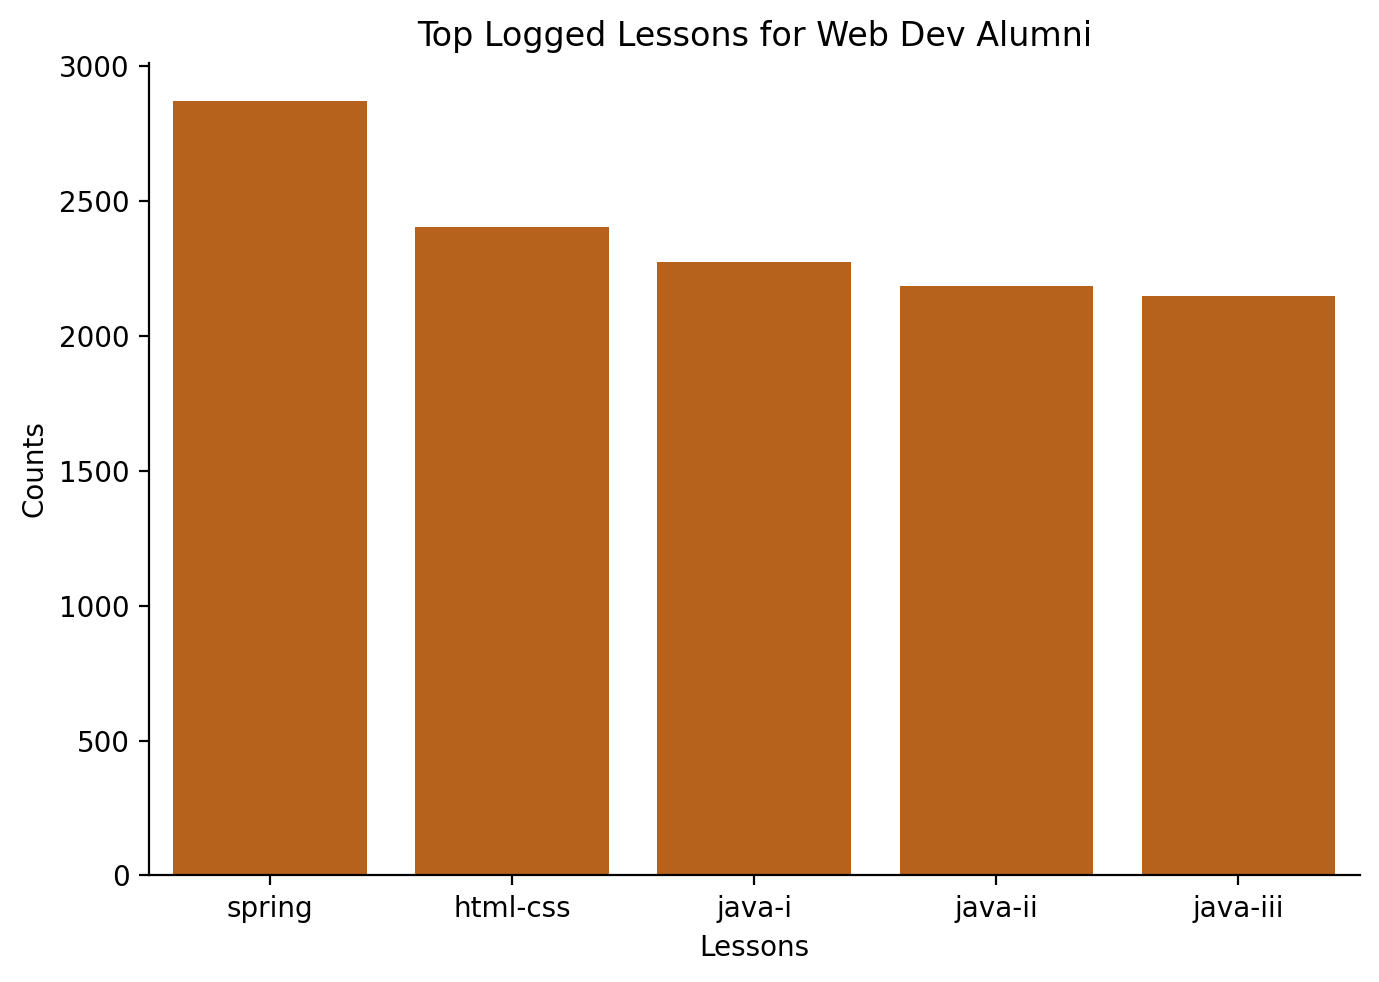

In [34]:
plot_top_wb_alumni_lessons()

In [35]:
alumni_logs['lesson'].value_counts()

/                              9228
javascript-i                   3152
spring                         2870
search/search_index.json       2834
html-css                       2403
                               ... 
10.04.04_TextClassification       1
10.04.05_TopicModeling            1
10.10_Exercises                   1
11.00_Intro.md                    1
7.04.01_Partitioning              1
Name: lesson, Length: 1377, dtype: int64

In [36]:
alumni_logs[alumni_logs['lesson'].str.startswith('javascript-i')]['lesson'].value_counts()


javascript-i                                                                 3152
javascript-ii                                                                1988
javascript-i/functions                                                        785
javascript-i/javascript-with-html                                             775
javascript-i/loops                                                            644
javascript-ii/promises                                                        625
javascript-i/conditionals                                                     613
javascript-ii/es6                                                             611
javascript-i/introduction/working-with-data-types-operators-and-variables     577
javascript-i/bom-and-dom/dom                                                  575
javascript-ii/ajax-api                                                        575
javascript-ii/npm                                                             568
javascript-ii/ma

In [37]:
alumni_logs[alumni_logs['lesson'].str.startswith('spring')]['lesson'].value_counts()


spring                                         2870
spring/fundamentals/controllers                1299
spring/setup                                   1236
spring/fundamentals/views                      1166
spring/fundamentals/repositories               1073
spring/fundamentals/form-model-binding          737
spring/fundamentals/relationships               709
spring/fundamentals/security/authentication     698
spring/fundamentals/services                    631
spring/fundamentals/security                    391
spring/extra-features/json-response             285
spring/extra-features/form-validation           238
spring/extra-features/file-upload               221
spring/extra-features/error-pages               157
spring/extra-features                           129
spring/fundamentals/integration-tests           119
spring/fundamentals                               3
spring/security                                   1
Name: lesson, dtype: int64

In [38]:
alumni_logs[alumni_logs['lesson'].str.startswith('html-css')]['lesson'].value_counts()


html-css                                       2403
html-css/elements                               937
html-css/introduction                           800
html-css/forms                                  671
html-css/css-i/selectors-and-properties         466
html-css/css-ii/bootstrap-grid-system           443
html-css/css-ii/bootstrap-introduction          440
html-css/css-i/box-model                        430
html-css/css-i/positioning                      399
html-css/css-ii/media-queries                   398
html-css/css-i/introduction                     368
html-css/css-i/flexbox/flexbox-fundamentals     274
html-css/css-i                                  234
html-css/css-i/flexbox/flexbox-in-practice      188
html-css/css-ii/grids                           175
html-css/css-ii                                 164
html-css/css-i/grid/css-grid-fundamentals       146
html-css/css-i/grid/css-grid-intro              106
html-css/css-i/grid/css-grid-in-practice         87
html-css/css

In [39]:
alumni_logs[alumni_logs['lesson'].str.startswith('html-css')]['lesson'].value_counts()


html-css                                       2403
html-css/elements                               937
html-css/introduction                           800
html-css/forms                                  671
html-css/css-i/selectors-and-properties         466
html-css/css-ii/bootstrap-grid-system           443
html-css/css-ii/bootstrap-introduction          440
html-css/css-i/box-model                        430
html-css/css-i/positioning                      399
html-css/css-ii/media-queries                   398
html-css/css-i/introduction                     368
html-css/css-i/flexbox/flexbox-fundamentals     274
html-css/css-i                                  234
html-css/css-i/flexbox/flexbox-in-practice      188
html-css/css-ii/grids                           175
html-css/css-ii                                 164
html-css/css-i/grid/css-grid-fundamentals       146
html-css/css-i/grid/css-grid-intro              106
html-css/css-i/grid/css-grid-in-practice         87
html-css/css

7. Which lessons are least accessed?
- slides and prework

8. Anything else I should be aware of?
